ML assignment6 

Han Minxuan

Gia Huy Phung

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [6]:
test_input = pd.read_csv('testInput.csv', header=None).values.T
test_output = pd.read_csv('testOutput.csv', header=None).values
train_input = pd.read_csv('trainInput.csv', header=None).values.T
train_output = pd.read_csv('trainOutput.csv', header=None).values
print(train_input.shape)
print(train_output.shape)
print(test_input.shape)
print(test_output.shape)

(1707, 256)
(1, 1707)
(2007, 256)
(1, 2007)


question1:

In [9]:
unique_digits = np.unique(train_output)
digit_matrices = {digit: train_input[train_output.flatten() == digit] for digit in unique_digits}

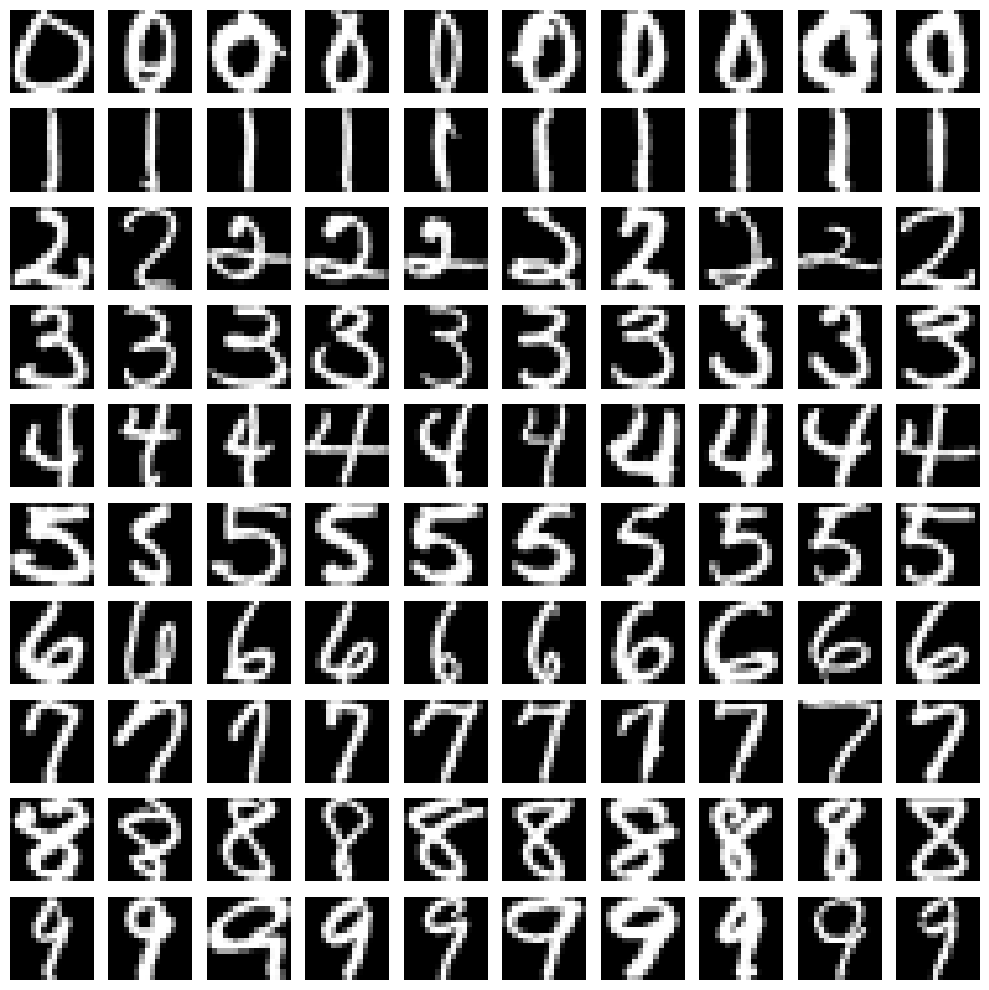

In [15]:
# Set up a grid with 10 rows and 10 columns 
plt.figure(figsize=(10, 10))
num_images = 10

for i, digit in enumerate(unique_digits):
    for j in range(num_images):
        plt.subplot(len(unique_digits), num_images, i * num_images + j + 1)
        # Display the j-th image for each digit
        plt.imshow(digit_matrices[digit][j].reshape(16, 16), cmap='gray')
        plt.axis('off')

    plt.subplot(len(unique_digits), num_images, i * num_images + 1)
    plt.ylabel(f'Digit {digit}', size=12, labelpad=20)

plt.tight_layout()
plt.show()

question2:

In [19]:
digit_svd_models = {}
for digit, matrix in digit_matrices.items():
    U, S, Vt = np.linalg.svd(matrix, full_matrices=False)
    digit_svd_models[digit] = Vt[:20]

In [21]:
digit_svd_models_array = np.array(list(digit_svd_models.values()))
digit_svd_models_array[0].shape

(20, 256)

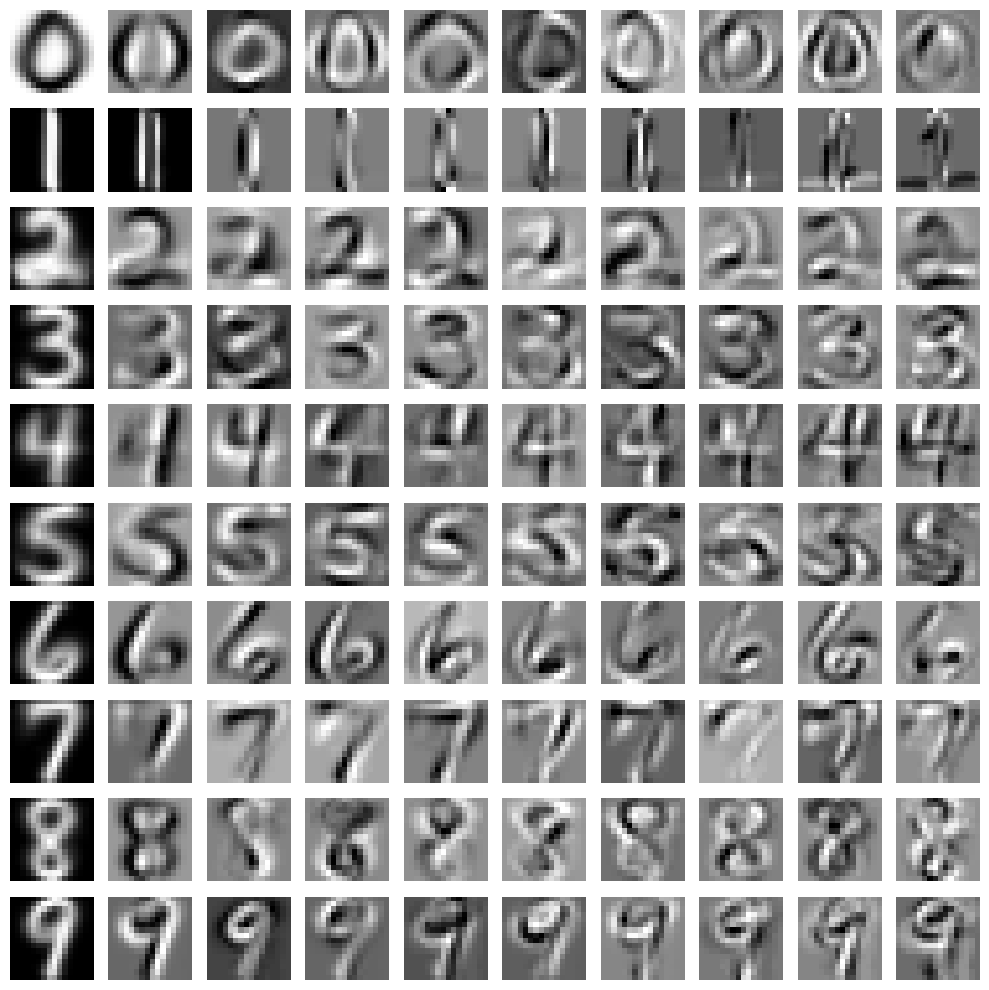

In [38]:
# Set up a grid with 10 rows and 10 columns
plt.figure(figsize=(10, 10))
num_images = 10

for i, digit in enumerate(unique_digits):
    for j in range(num_images):
        plt.subplot(len(unique_digits), num_images, i * num_images + j + 1)
        plt.imshow(digit_svd_models[digit][j].reshape(16, 16), cmap='gray')
        plt.axis('off')

    plt.subplot(len(unique_digits), num_images, i * num_images + 1)
    plt.ylabel(f'Digit {digit}', size=12, labelpad=20)

plt.tight_layout()
plt.show()

question3:

In [30]:
predictions = []
for i in range(test_input.shape[0]):
    test_image = test_input[i, :]
    min_residual = float('inf')
    best_digit = None

    for digit, Vt in digit_svd_models.items():
        coefficients = np.linalg.lstsq(Vt.T, test_image, rcond=None)
        approximation = Vt.T @ coefficients[0]
        residual = np.linalg.norm(test_image - approximation)
        if residual < min_residual:
            min_residual = residual
            best_digit = digit
    predictions.append(best_digit)

In [32]:
test_input.shape[0]

2007

In [34]:
digit_svd_models.items()

dict_items([(0, array([[ 0.09524001,  0.09503552,  0.09418541, ...,  0.09514043,
         0.09524001,  0.09524001],
       [ 0.01013981,  0.01026385,  0.01111053, ...,  0.00984762,
         0.01013981,  0.01013981],
       [ 0.00398899,  0.00393748,  0.00429368, ...,  0.00395189,
         0.00398899,  0.00398899],
       ...,
       [-0.02516537, -0.02704063, -0.03996783, ..., -0.02554902,
        -0.02516537, -0.02516537],
       [ 0.00304414,  0.00439816,  0.00281445, ...,  0.00282108,
         0.00304414,  0.00304414],
       [ 0.0263868 ,  0.02605399,  0.02232076, ...,  0.02548735,
         0.0263868 ,  0.0263868 ]])), (1, array([[-0.06778398, -0.06778398, -0.06778398, ..., -0.06778398,
        -0.06778398, -0.06778398],
       [-0.00801531, -0.00801531, -0.00801531, ..., -0.00801531,
        -0.00801531, -0.00801531],
       [ 0.00321038,  0.00321038,  0.00321038, ...,  0.00321038,
         0.00321038,  0.00321038],
       ...,
       [ 0.00270513,  0.00270513,  0.00270513, ...,  

In [36]:
test_output_array = test_output.flatten()
print(test_output_array)
print(test_output_array.shape)

[9 6 3 ... 4 0 1]
(2007,)


question4:

In [41]:
predictions = np.array(predictions, dtype=int)
overall_accuracy = accuracy_score(test_output.flatten(), predictions)

print(f"Overall Accuracy: {overall_accuracy:.2%}")

Overall Accuracy: 93.97%
